# Toy model evaluation of FE estimation and clustering 

In [1]:
import numpy as np
import toy_models
import GMM_FE
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Create model
tm_GMM_2D = toy_models.toy_model_2D_GMM()

nx = 30
x_lims = [[0,1],[0,1]]

In [3]:
# Sample from model
data = tm_GMM_2D.sample(2000)

# Compute true density at points
data_density = tm_GMM_2D.density(data)

*------------------Gaussian mixture model free energy estimator------------------*
   n_splits = 3
   shuffle_data = False
   n_iterations = 1
   n_grids = 30
   covergence_tol = 0.0001
   mixture_of_landscapes = False
   axes limits (x_lim) = [[0, 1], [0, 1]]
   temperature = 300.0
   min_n_components = 8
   max_n_components = None
*--------------------------------------------------------------------------------*


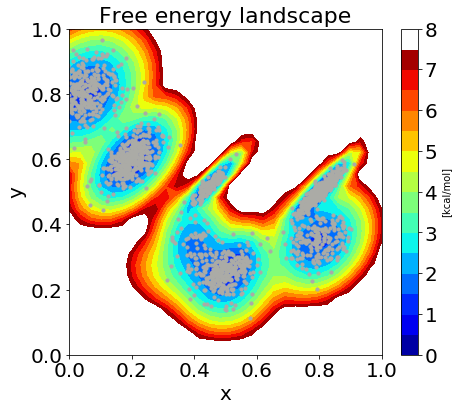

In [4]:
# Create a free energy object with known toy model
true_fe = GMM_FE.FreeEnergy(data,x_lims=x_lims,n_grids=nx)
true_fe.density_est_ = tm_GMM_2D
coords, density = true_fe.density_landscape()

# Compute true free energy
FE_landscape = true_fe._free_energy(density)
min_FE = np.min(FE_landscape)
FE_landscape = FE_landscape-min_FE

FE_points = true_fe._free_energy(data_density)-min_FE

# Set true free energies
true_fe.coords_ = coords
true_fe.FE_landscape_ = FE_landscape
true_fe.FE_points_ = FE_points

# Visualize the model
true_fe.visualize(show_data=True)

In [5]:
# Cluster data
labels, cluster_centers = true_fe.cluster(coords,FE_points,data)

Clustering free energy landscape...
Computing Hessians.
Constructing connected components.
# Graph connections: 60.0
Clustering data points.
Done clustering.


[ 240 1006  635  284  493  971 1278]


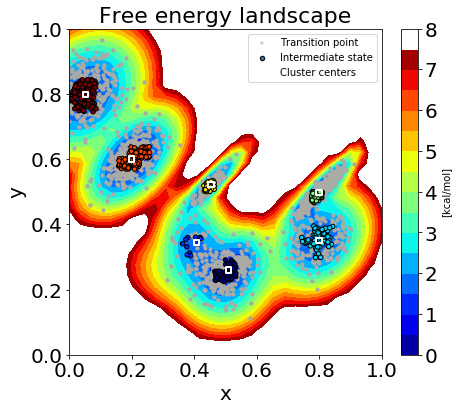

In [6]:
# Visualize true clusters
true_fe.visualize(show_data=True)
print(cluster_centers)

In [5]:
# Estimate free energy and clustering with GMM and cross-validation
stack_landscapes = True

gmm_FE = GMM_FE.FreeEnergy(data,min_n_components=5,max_n_components=8,x_lims=[[0,1],[0,1]], n_grids=nx, stack_landscapes=stack_landscapes, n_iterations=5)

est_coords, est_FE_landscape, est_FE_points = gmm_FE.landscape()

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 3
   shuffle_data = False
   n_iterations = 5
   n_grids = 30
   covergence_tol = 0.0001
   stack_landscapes = True
   axes limits (x_lim) = [[0, 1], [0, 1]]
   temperature = 300.0
   min_n_components = 5
   max_n_components = 8
*----------------------------------------------------------------------------*
Estimating density with GMM.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
Weighting together all density estimators.
Removing zero-weighted models.
Evaluating density in landscape
Density grid shape: (30, 30)


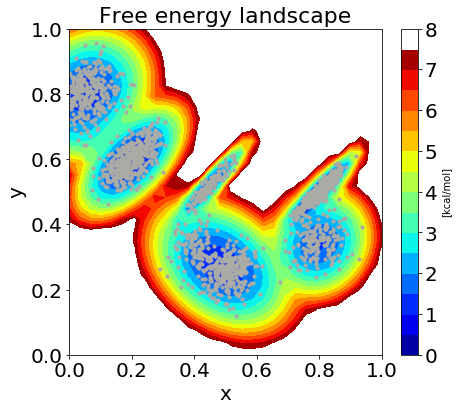

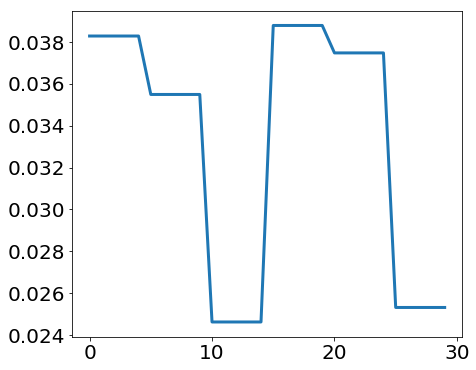

In [6]:
# Visualize estimated free energy landscape
gmm_FE.visualize(show_data=True)

if stack_landscapes:
    plt.figure(2)
    plt.plot(gmm_FE.density_est_.model_weights_,linewidth=3)

In [7]:
# Cluster based on estimated density model
est_labels, est_cluster_centers = gmm_FE.cluster(est_coords,est_FE_points,data)

Clustering free energy landscape...
Computing Hessians.
Constructing connected components.
# Graph connections: 96.0
Clustering data points.
Done clustering.


[ 985 1563  441 1073 1518  765  116]


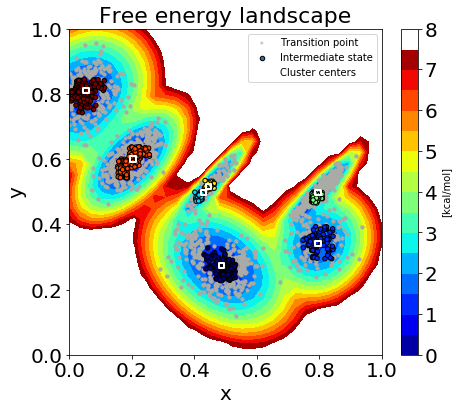

In [8]:
gmm_FE.visualize(show_data=True)
print(est_cluster_centers)
if not(stack_landscapes):
    print(gmm_FE.density_est_.n_components_)

In [2]:
tm_eval = toy_models.MethodEvaluator()
tm_eval.run_evaluation(2, 4000, n_iterations=1, min_n_components=2, max_n_components=15, n_splits=3)

*------------------Gaussian mixture model free energy estimator------------------*
   n_splits = 3
   shuffle_data = False
   n_iterations = 1
   n_grids = 30
   covergence_tol = 0.0001
   mixture_of_landscapes = False
   axes limits (x_lim) = [[0.044582957976214276, 0.8613170666397435], [0.4971186079393735, 0.8257528948544698]]
   temperature = 300.0
   min_n_components = 8
   max_n_components = None
*--------------------------------------------------------------------------------*
*------------------Gaussian mixture model free energy estimator------------------*
   n_splits = 3
   shuffle_data = False
   n_iterations = 1
   n_grids = 30
   covergence_tol = 0.0001
   mixture_of_landscapes = False
   axes limits (x_lim) = [[0.07523108898770804, 0.8106459821023645], [0.29588325573888474, 0.8977908174217931]]
   temperature = 300.0
   min_n_components = 2
   max_n_components = 15
*--------------------------------------------------------------------------------*
*------------------Gaussia

NameError: name 'file_label' is not defined

In [4]:
print(tm_eval.FE_errors_GMM_CV_)
print(tm_eval.FE_errors_mix_models_)

[2.27780841 2.33658575]
[2.33504899 2.69946481]
